In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('Heartdisease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

In [9]:
data1=data

In [10]:
for col in data1.columns:
    if data1.skew().loc[col]>0.55:
        data1[col]=np.log1p(data1[col])
    elif data1.skew().loc[col]<-0.55:
        data1[col]=np.power(data1[col],3)

In [11]:
data1.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.284837
chol        0.090242
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     0.396825
slope      -0.508316
ca          0.757752
thal       -0.476722
target     -0.179821
dtype: float64

In [12]:
for col in data1.columns:
    if data1.skew().loc[col]>0.55:
        data1[col]=np.log1p(data1[col])
    elif data1.skew().loc[col]<-0.55:
        data1[col]=np.power(data1[col],3)

In [13]:
data1.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.284837
chol        0.090242
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     0.396825
slope      -0.508316
ca          0.558701
thal       -0.476722
target     -0.179821
dtype: float64

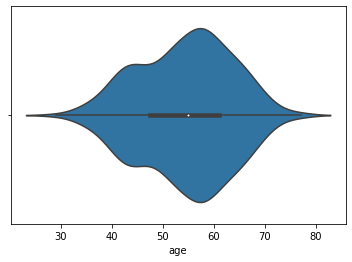

In [14]:
sns.violinplot(x=data1.age)

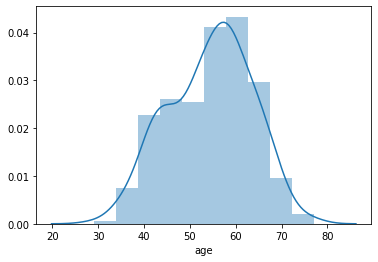

In [15]:
sns.distplot(data1.age,bins=10)

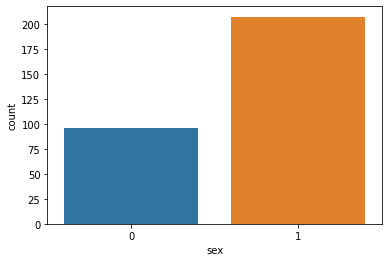

In [16]:
sns.countplot(data1.sex)

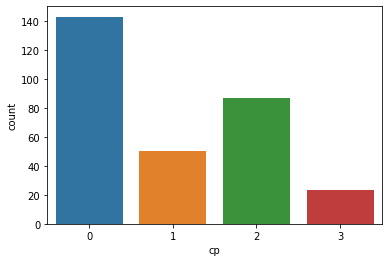

In [17]:
sns.countplot(data1.cp)

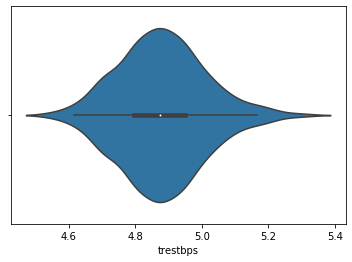

In [18]:
sns.violinplot(data1.trestbps)

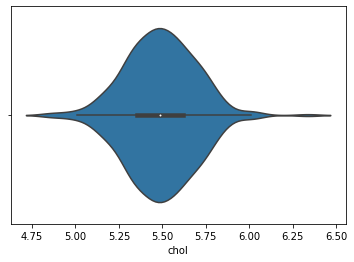

In [19]:
sns.violinplot(data1.chol)

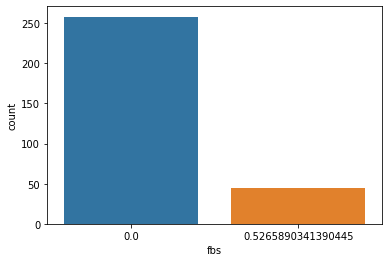

In [20]:
sns.countplot(data1.fbs)

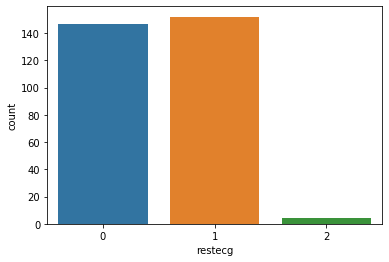

In [21]:
sns.countplot(data1.restecg)

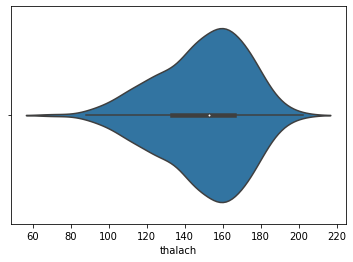

In [22]:
sns.violinplot(data1.thalach)

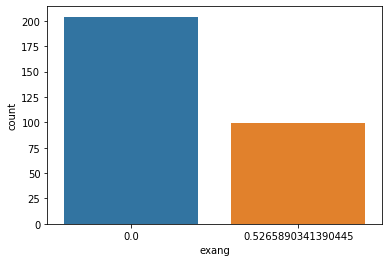

In [23]:
sns.countplot(data1.exang)

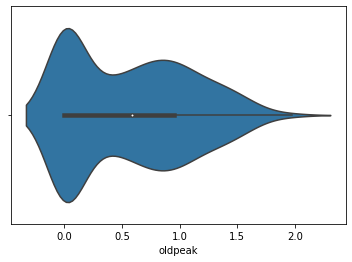

In [24]:
sns.violinplot(data1.oldpeak)

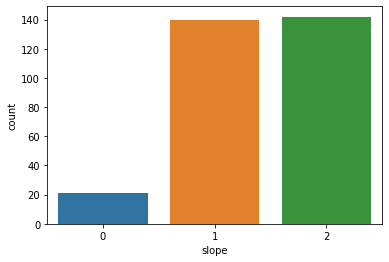

In [25]:
sns.countplot(data1.slope)

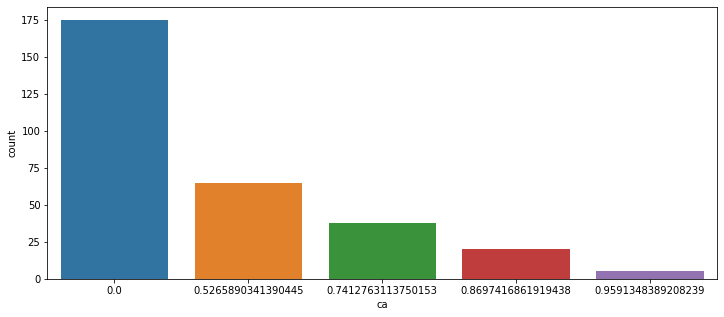

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(data1.ca)

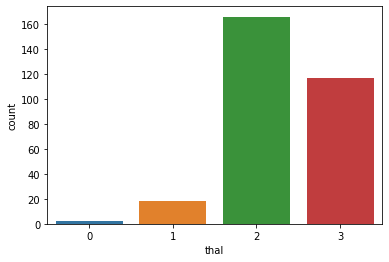

In [27]:
sns.countplot(data1.thal)

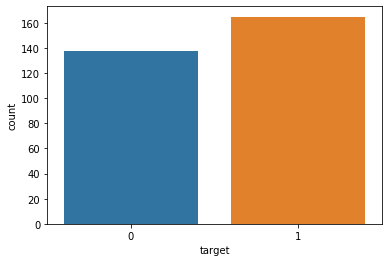

In [28]:
sns.countplot(data1.target)

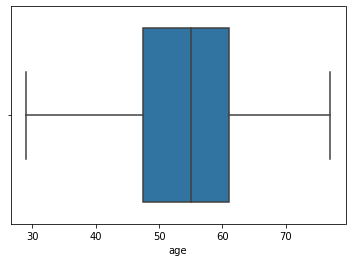

In [29]:
sns.boxplot(data1.age)

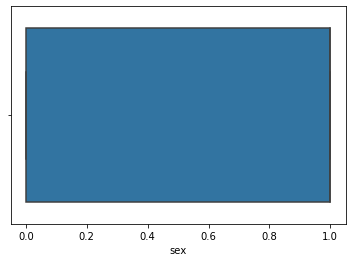

In [30]:
sns.boxplot(data['sex'])

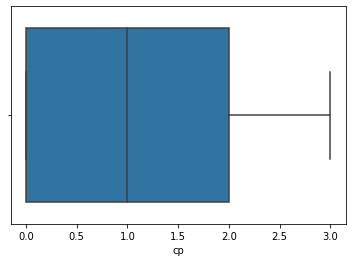

In [31]:
sns.boxplot(data1.cp)

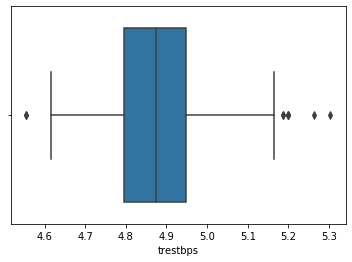

In [32]:
sns.boxplot(data1.trestbps)

In [33]:
data1=data1[(data1['trestbps']>4.57) & (data1['trestbps']<5.15)]

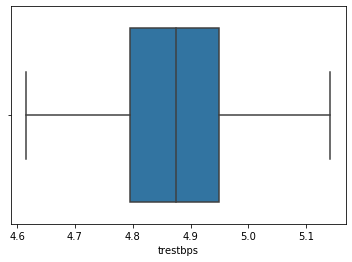

In [34]:
sns.boxplot(data1.trestbps)

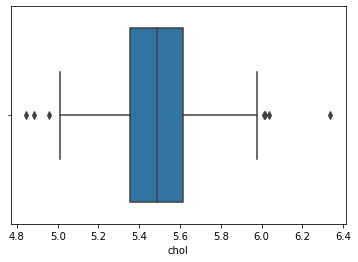

In [35]:
sns.boxplot(data1.chol)

In [36]:
data1=data1[(data1['chol']>5) & (data1['chol']<6)]

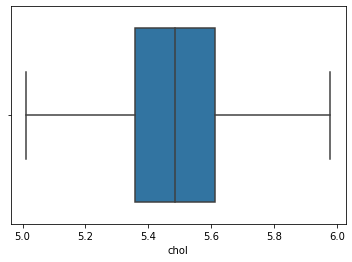

In [37]:
sns.boxplot(data1.chol)

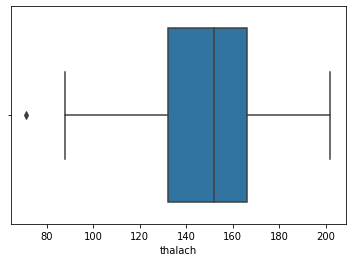

In [38]:
sns.boxplot(data1.thalach)

In [39]:
data1=data1[data1.thalach>80]

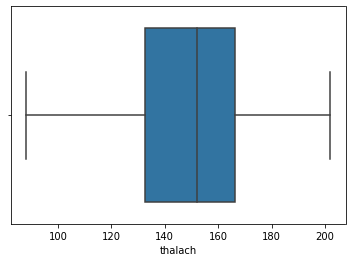

In [40]:
sns.boxplot(data1.thalach)

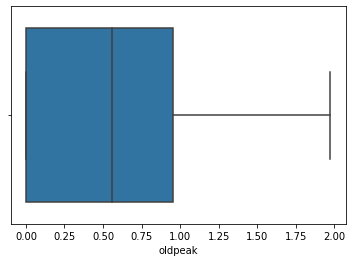

In [41]:
sns.boxplot(data1.oldpeak)

In [42]:
data1.shape

(284, 14)

In [43]:
from sklearn.naive_bayes import BernoulliNB as BNB
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC

In [44]:
from sklearn.linear_model import LogisticRegression as LR

In [45]:
BNB=BNB()
GNB=GNB()
KNN=KNN(n_neighbors=6)
DTC=DTC()
SV=SVC()
LR=LR()

In [46]:
models=[]
models.append(('BernoulliNB',BNB))
models.append(('GaussianNB',GNB))
models.append(('KNeighborsClassifier',KNN))
models.append(('DecisionTreeClassifier',DTC))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models

[('BernoulliNB',
  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)),
 ('GaussianNB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('KNeighborsClassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                       weights='uniform')),
 ('DecisionTreeClassifier',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probab

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score

In [48]:
data_in=data1.drop('target',axis=1)
data_op=data1.target

In [49]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(data_in,data_op,stratify=data_op,test_size=0.33)

In [50]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************',name,'********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    accuracy=accuracy_score(y_test,y_pred)
    print('Accuracy score=',accuracy)
    score.append(accuracy)
    print('\n')
    sc=cross_val_score(model,data_in,data_op,cv=10,scoring='accuracy').mean()
    print('cross_value score=',sc)
    cvs.append(sc)
    print('\n')
    rocscor=roc_auc_score(y_test,y_pred)
    print('Roc_score=',rocscor)
    rocscore.append(rocscor)
    

****************** BernoulliNB ********************


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


Accuracy score= 0.8297872340425532


cross_value score= 0.8267286991424923


Roc_score= 0.8301282051282051
****************** GaussianNB ********************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy score= 0.8404255319148937


cross_value score= 0.8203430031016238


Roc_score= 0.8443223443223442
****************** KNeighborsClassifier ********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy score= 0.6914893617021277


cross_value score= 0.7072158365261813


Roc_score= 0.7074175824175825
****************** DecisionTreeClassifier ********************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=No

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
max_score=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=i,test_size=0.33,stratify=data_op)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('accuracy score at',i,'is',accuracy)
    if accuracy>max_score:
        max_score=accuracy
        final_state=i
print('max accuracy is ',max_score,'at',final_state)

accuracy score at 0 is 0.8404255319148937
accuracy score at 1 is 0.8617021276595744
accuracy score at 2 is 0.8617021276595744
accuracy score at 3 is 0.851063829787234
accuracy score at 4 is 0.7872340425531915
accuracy score at 5 is 0.8829787234042553
accuracy score at 6 is 0.8723404255319149
accuracy score at 7 is 0.851063829787234
accuracy score at 8 is 0.7978723404255319
accuracy score at 9 is 0.8404255319148937
accuracy score at 10 is 0.851063829787234
accuracy score at 11 is 0.851063829787234
accuracy score at 12 is 0.8617021276595744
accuracy score at 13 is 0.851063829787234
accuracy score at 14 is 0.7553191489361702
accuracy score at 15 is 0.851063829787234
accuracy score at 16 is 0.8617021276595744
accuracy score at 17 is 0.8297872340425532
accuracy score at 18 is 0.8085106382978723
accuracy score at 19 is 0.8617021276595744
accuracy score at 20 is 0.8617021276595744
accuracy score at 21 is 0.8085106382978723
accuracy score at 22 is 0.8404255319148937
accuracy score at 23 is 0.8

In [52]:
x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=59,test_size=0.33,stratify=data_op)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
accuracy,accuracy1

(0.9042553191489362, 0.8421052631578947)

In [53]:
c=confusion_matrix(y_test,y_pred)
c

array([[37,  5],
       [ 4, 48]], dtype=int64)

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [55]:
lr_test_auc=roc_auc_score(y_test,y_pred)
lr_train_auc=roc_auc_score(y_train,train_pred)

In [56]:
lr_test_auc,lr_train_auc

(0.902014652014652, 0.8336314847942755)

In [57]:
lr_test_probs=lr.predict_proba(x_test)
lr_train_probs=lr.predict_proba(x_train)
lr_test_probs=lr_test_probs[:,1]
lr_train_probs=lr_train_probs[:,1]

In [58]:
lr_test_fpr,lr_test_tpr,test_threshold=roc_curve(y_test,lr_test_probs)
lr_train_fpr,lr_train_tpr,train_threshold=roc_curve(y_train,lr_train_probs)

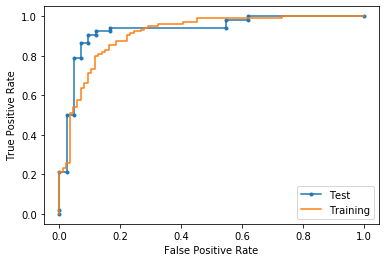

In [59]:
plt.plot(lr_test_fpr,lr_test_tpr,marker='.',label='Test')
plt.plot(lr_train_fpr,lr_train_tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [60]:
from sklearn.naive_bayes import BernoulliNB as BNB
BNB=BNB()

In [89]:
BNB.fit(x_train,y_train)
y_pred=BNB.predict(x_test)
train_pred=BNB.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
accuracy,accuracy1

(0.8829787234042553, 0.8052631578947368)

In [90]:
c=confusion_matrix(y_test,y_pred)
c

array([[39,  3],
       [ 8, 44]], dtype=int64)

In [62]:
BNB_test_auc=roc_auc_score(y_test,y_pred)
BNB_train_auc=roc_auc_score(y_train,train_pred)

In [63]:
BNB_test_auc,BNB_train_auc

(0.8873626373626374, 0.8029964221824687)

In [64]:
from sklearn.naive_bayes import GaussianNB as GNB
GNB=GNB()

In [65]:
GNB.fit(x_train,y_train)
y_pred=GNB.predict(x_test)
train_pred=GNB.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
accuracy,accuracy1

(0.8829787234042553, 0.8315789473684211)

In [66]:
c=confusion_matrix(y_test,y_pred)
c

array([[37,  5],
       [ 6, 46]], dtype=int64)

In [67]:
GNB_test_auc=roc_auc_score(y_test,y_pred)
GNB_train_auc=roc_auc_score(y_train,train_pred)
GNB_test_auc,GNB_train_auc

(0.8827838827838828, 0.8280411449016101)

In [68]:
for i in range(0,100):
    from sklearn.ensemble import RandomForestClassifier as RFC
    RFC=RFC(random_state=i,criterion='entropy')
    RFC.fit(x_train,y_train)
    y_pred=RFC.predict(x_test)
    train_pred=RFC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    print('at random state ',i,'test accuracy:',accuracy,'train accuracy:',accuracy1)

at random state  0 test accuracy: 0.8297872340425532 train accuracy: 1.0
at random state  1 test accuracy: 0.8404255319148937 train accuracy: 0.9736842105263158
at random state  2 test accuracy: 0.851063829787234 train accuracy: 0.9947368421052631
at random state  3 test accuracy: 0.8085106382978723 train accuracy: 0.9947368421052631
at random state  4 test accuracy: 0.8191489361702128 train accuracy: 0.9894736842105263
at random state  5 test accuracy: 0.8085106382978723 train accuracy: 1.0
at random state  6 test accuracy: 0.8723404255319149 train accuracy: 1.0
at random state  7 test accuracy: 0.8404255319148937 train accuracy: 1.0
at random state  8 test accuracy: 0.8191489361702128 train accuracy: 0.9894736842105263
at random state  9 test accuracy: 0.8617021276595744 train accuracy: 0.9789473684210527
at random state  10 test accuracy: 0.851063829787234 train accuracy: 0.9947368421052631
at random state  11 test accuracy: 0.8829787234042553 train accuracy: 0.9842105263157894
at r

In [69]:
for i in range(0,100):
    from sklearn.ensemble import RandomForestClassifier as RFC
    RFC=RFC(random_state=i,criterion='gini')
    RFC.fit(x_train,y_train)
    y_pred=RFC.predict(x_test)
    train_pred=RFC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    print('at random state ',i,'test accuracy:',accuracy,'train accuracy:',accuracy1)

at random state  0 test accuracy: 0.8297872340425532 train accuracy: 0.9947368421052631
at random state  1 test accuracy: 0.8404255319148937 train accuracy: 0.9789473684210527
at random state  2 test accuracy: 0.8191489361702128 train accuracy: 0.9947368421052631
at random state  3 test accuracy: 0.8617021276595744 train accuracy: 0.9894736842105263
at random state  4 test accuracy: 0.8723404255319149 train accuracy: 0.9842105263157894
at random state  5 test accuracy: 0.8404255319148937 train accuracy: 1.0
at random state  6 test accuracy: 0.851063829787234 train accuracy: 0.9894736842105263
at random state  7 test accuracy: 0.8723404255319149 train accuracy: 1.0
at random state  8 test accuracy: 0.7978723404255319 train accuracy: 1.0
at random state  9 test accuracy: 0.8723404255319149 train accuracy: 0.9736842105263158
at random state  10 test accuracy: 0.8191489361702128 train accuracy: 0.9894736842105263
at random state  11 test accuracy: 0.8404255319148937 train accuracy: 0.98947

at random state  96 test accuracy: 0.8404255319148937 train accuracy: 0.9947368421052631
at random state  97 test accuracy: 0.8191489361702128 train accuracy: 0.9894736842105263
at random state  98 test accuracy: 0.7872340425531915 train accuracy: 0.9789473684210527
at random state  99 test accuracy: 0.851063829787234 train accuracy: 0.9789473684210527


In [91]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC_gini=RFC(random_state=36,criterion='gini')
RFC_gini.fit(x_train,y_train)
y_pred=RFC_gini.predict(x_test)
train_pred=RFC_gini.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
accuracy,accuracy1

(0.9042553191489362, 0.9894736842105263)

In [92]:
c=confusion_matrix(y_test,y_pred)
c

array([[39,  3],
       [ 6, 46]], dtype=int64)

In [93]:
RFC_test_auc=roc_auc_score(y_test,y_pred)
RFC_train_auc=roc_auc_score(y_train,train_pred)
RFC_test_auc,RFC_train_auc

(0.9065934065934066, 0.9903846153846154)

In [97]:
RFC_test_probs=RFC_gini.predict_proba(x_test)
RFC_train_probs=RFC_gini.predict_proba(x_train)
RFC_test_probs=RFC_test_probs[:,1]
RFC_train_probs=RFC_train_probs[:,1]

In [98]:
RFC_test_fpr,RFC_test_tpr,test_threshold=roc_curve(y_test,RFC_test_probs)
RFC_train_fpr,RFC_train_tpr,train_threshold=roc_curve(y_train,RFC_train_probs)

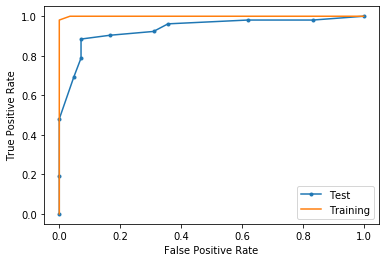

In [99]:
plt.plot(RFC_test_fpr,RFC_test_tpr,marker='.',label='Test')
plt.plot(RFC_train_fpr,RFC_train_tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [100]:
HeartDisease_pred=pd.DataFrame({'Predicted':y_pred},index=y_test.index)
HeartDisease_pred

,Predicted
76,1
244,0
23,0
98,1
245,0
236,0
68,1
185,0
261,0
158,0


In [101]:
HD_actual=pd.DataFrame(y_test,index=y_test.index)
HD_actual

,target
76,1
244,0
23,1
98,1
245,0
236,0
68,1
185,0
261,0
158,1


In [102]:
HD_op=pd.concat([HD_actual,HeartDisease_pred],axis=1)
HD_op

,target,Predicted
76,1,1
244,0,0
23,1,0
98,1,1
245,0,0
236,0,0
68,1,1
185,0,0
261,0,0
158,1,0


In [103]:
HD_op.to_csv('HeartDisease_op.csv')

In [76]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC=RFC(n_estimators=200,max_depth=4,criterion='entropy',random_state=43)
for i in range(0,20):
    from sklearn.ensemble import AdaBoostClassifier as ABC
    ABC=ABC(base_estimator=RFC,learning_rate=0.5,random_state=i)
    ABC.fit(x_train,y_train)
    y_pred=ABC.predict(x_test)
    train_pred=ABC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    print('accuracy at :',i,'is:',accuracy)

accuracy at : 0 is: 0.8617021276595744
accuracy at : 1 is: 0.8723404255319149
accuracy at : 2 is: 0.8829787234042553
accuracy at : 3 is: 0.8829787234042553
accuracy at : 4 is: 0.8829787234042553
accuracy at : 5 is: 0.8723404255319149
accuracy at : 6 is: 0.8617021276595744
accuracy at : 7 is: 0.8723404255319149
accuracy at : 8 is: 0.8723404255319149
accuracy at : 9 is: 0.8829787234042553
accuracy at : 10 is: 0.8617021276595744
accuracy at : 11 is: 0.8829787234042553
accuracy at : 12 is: 0.8617021276595744
accuracy at : 13 is: 0.8723404255319149
accuracy at : 14 is: 0.8723404255319149
accuracy at : 15 is: 0.8723404255319149
accuracy at : 16 is: 0.8723404255319149
accuracy at : 17 is: 0.8723404255319149
accuracy at : 18 is: 0.851063829787234
accuracy at : 19 is: 0.8829787234042553


In [77]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC=RFC(n_estimators=200,max_depth=4,criterion='entropy',random_state=36)
from sklearn.ensemble import AdaBoostClassifier as ABC
ABC=ABC(base_estimator=RFC,learning_rate=0.5,random_state=2)
ABC.fit(x_train,y_train)
y_pred=ABC.predict(x_test)
train_pred=ABC.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
accuracy,accuracy1

(0.8829787234042553, 0.968421052631579)

In [78]:
ABC_test_auc=roc_auc_score(y_test,y_pred)
ABC_train_auc=roc_auc_score(y_train,train_pred)
ABC_test_auc,ABC_train_auc

(0.8782051282051282, 0.9661225402504472)

In [79]:
c=confusion_matrix(y_test,y_pred)
c

array([[35,  7],
       [ 4, 48]], dtype=int64)

In [80]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=20)
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=20,
    shrinking=True, tol=0.001, verbose=False)

In [81]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [82]:
accuracy=grid_search.best_score_
accuracy

0.8157894736842105

In [83]:
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [84]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=25,C=10,gamma=0.8,probability=True)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
train_pred=classifier.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)
c=confusion_matrix(y_test,y_pred)
c

0.8723404255319149 0.8578947368421053


array([[35,  7],
       [ 5, 47]], dtype=int64)

In [85]:
svc_test_auc=roc_auc_score(y_test,y_pred)
svc_train_auc=roc_auc_score(y_train,train_pred)
svc_test_auc,svc_train_auc

(0.8685897435897435, 0.8490608228980322)

In [86]:
svc_test_probs=classifier.predict_proba(x_test)
svc_train_probs=classifier.predict_proba(x_train)
svc_test_probs=svc_test_probs[:,1]
svc_train_probs=svc_train_probs[:,1]

In [87]:
svc_test_fpr,svc_test_tpr,test_threshold=roc_curve(y_test,svc_test_probs)
svc_train_fpr,svc_train_tpr,train_threshold=roc_curve(y_train,svc_train_probs)

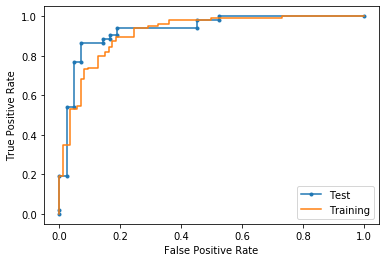

In [88]:
plt.plot(svc_test_fpr,svc_test_tpr,marker='.',label='Test')
plt.plot(svc_train_fpr,svc_train_tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [104]:
from sklearn.externals import joblib

In [105]:
joblib.dump(RFC_gini,'HeartDisease_RFC_gini.pkl')

['HeartDisease_RFC_gini.pkl']